In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
train = pd.read_csv('train.csv').drop('ID',axis=1)
test = pd.read_csv('test.csv').drop('ID',axis=1)

In [8]:
train['new'] = train['first_party'] + ' ' + train['second_party'] + ' ' + train['facts']
test['new'] = test['first_party'] + ' ' + test['second_party'] + ' ' + test['facts']

In [9]:
x_train = train['new']
y_train = np.array(train['first_party_winner'])

x_test = test['new']

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2, random_state=42, stratify=y_train)

print('훈련용 : {}'.format(len(x_train)))
print('검증용 : {}'.format(len(x_val)))
num_classes = len(set(pd.Series(y_train).unique()))
print('카테고리 : {}'.format(num_classes))

훈련용 : 1982
검증용 : 496
카테고리 : 2


In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
X_train = tokenizer.texts_to_sequences(x_train)
print(X_train[:5])

[[12007, 12008, 52, 5347, 22, 1005, 2746, 2, 933, 409, 786, 12009, 802, 551, 52, 53, 1, 9102, 1328, 409, 786, 10, 2472, 18, 9103, 9104, 4, 10, 1548, 5, 174, 3057, 3, 2473, 18, 12010, 4276, 60, 131, 31, 300, 60, 18, 5, 953, 12011, 7, 1277, 18, 60, 4277, 356, 188, 3260, 27, 1, 565, 18, 1091, 356, 30, 1372, 41, 13, 569, 60, 3, 1048, 60, 174, 3057, 3, 131, 1, 9105, 84, 1, 131, 1, 1500, 4, 1, 131, 12, 4, 63, 6, 54, 67, 1, 1006, 18, 1091, 30, 1148, 1, 1768, 30, 4, 17, 1091, 339, 1, 12, 8, 71, 1, 2611, 85, 3, 242, 35, 1, 81, 2142, 4278, 1, 1372, 31, 121, 206, 3, 2249, 106, 349, 980, 123, 4279, 27, 1, 1148, 4, 1768, 30, 1, 9105, 96, 4, 63, 6, 1, 3261, 405, 41, 13, 312, 35, 54, 32, 357, 192, 31, 55, 13, 1, 4761, 2, 153, 1, 1372, 300, 1, 28, 26, 8, 2, 20, 9, 1, 198, 23, 46, 1, 444, 4, 37, 6, 1, 9102, 81, 32, 3881, 1613, 31, 116, 7370, 1, 4761, 2, 81, 1, 1372, 10, 1549, 3, 1070, 4, 186, 1, 3261, 405, 200], [5348, 1501, 818, 4762, 1026, 65, 5348, 1501, 818, 5348, 2358, 5, 250, 11, 5, 1303, 3, 2612

In [36]:
X_val = tokenizer.texts_to_sequences(x_val)
print(X_val[:5])

[[6418, 35, 29, 55, 5, 3073, 2, 19, 586, 394, 1, 261, 126, 2, 128, 997, 126, 55, 264, 3, 277, 2, 1, 211, 92, 30, 2, 1055, 97, 2, 277, 632, 282, 124, 11, 793, 5432, 34, 177, 6442, 27, 97, 11937, 1, 126, 2, 683, 276, 5, 740, 5661, 1094, 3327, 3, 6958, 3433, 34, 349, 4353, 1105, 1, 821, 2, 7100, 565, 3, 282, 124, 11, 1, 373, 403, 202, 5, 230, 108, 77, 3, 1116, 1, 126, 24, 6506, 17, 4481, 754, 4766, 102, 7, 2536, 63, 6, 1, 2536, 102, 236, 67, 1, 740, 35, 29, 21, 1, 821, 2, 7100, 271, 2536, 3, 282, 124, 11, 50, 177, 6442, 2827, 1, 126, 3, 6462, 271, 2536, 1, 12, 8, 1793, 1, 236, 1, 8, 2, 20, 46, 351, 6418, 1, 471, 2, 1, 126, 2007, 63, 123, 119, 184, 6, 277, 41, 13, 371, 5, 316, 2, 108, 3, 1479, 1, 740], [3207, 5296, 2706, 4119, 12, 468, 90, 2021, 810, 4819, 619, 135, 170, 52, 53, 3207, 5296, 2706, 4119, 12, 468, 90, 3207, 165, 5, 960, 95, 11078, 29, 24, 97, 320, 2, 1, 638, 92, 30, 2, 1589, 4, 7423, 63, 6, 97, 320, 10, 244, 97, 320, 632, 1067, 5164, 3810, 33, 4, 563, 6600, 18, 2, 700, 282, 7

In [12]:
X_test = tokenizer.texts_to_sequences(x_test)
print(X_test[:5])

[[36, 33, 1, 1252, 3140, 1411, 30, 321, 1, 19, 184, 3, 4409, 16, 18095, 263, 3, 43, 120, 1, 82, 89, 505, 6, 1, 452, 10, 3117, 3158, 3, 72, 842, 7, 1, 802, 2069, 162, 6, 4, 295, 311, 7, 59, 48, 32, 12797, 10178, 7, 1, 11478, 337, 490], [4, 65, 65, 10, 5, 386, 7, 5, 230, 108, 335, 27, 757, 1342, 97, 5, 1, 335, 10, 1395, 9, 1751, 255, 3, 1, 12, 2, 315, 97, 5, 1668, 1, 504, 352, 11, 17318, 744, 3, 930, 211, 342, 18, 874, 720, 2, 480, 3, 83, 12, 9, 9827, 34, 658, 1751, 255, 47, 494, 6, 1, 352, 784, 502, 83, 150, 108, 3, 1, 614, 12, 40, 34, 123, 1, 1460, 2, 150, 1751, 255, 44, 81, 51, 29, 32, 122, 202, 77, 51, 4, 510, 7, 1, 230, 108, 335, 7, 1, 1153, 12, 2, 285, 341, 1, 352, 27, 97, 5, 289, 1, 48, 1395, 3, 1, 12, 2, 315, 2838, 160, 9, 1, 315, 12, 8, 3, 502, 1, 48, 3, 285, 45, 5, 1933, 1, 315, 12, 8, 3, 5198, 97, 5, 3, 930, 1, 48, 3, 952, 9, 43, 341, 1, 8, 2133, 1, 48, 3, 952, 4, 1, 8, 2, 20, 46, 42, 95], [99, 13715, 14024, 277, 19, 713, 182, 52, 53, 2599, 1298, 2169, 65, 52, 53, 7, 1041, 4, 

In [13]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'the': 1, 'of': 2, 'to': 3, 'and': 4, 'a': 5, 'that': 6, 'in': 7, 'court': 8, 'for': 9, 'was': 10, 'on': 11, 'district': 12, 'not': 13, 'his': 14, 'by': 15, 'an': 16, 'state': 17, 'with': 18, 'federal': 19, 'appeals': 20, 'had': 21, 'as': 22, 'circuit': 23, 'from': 24, 'he': 25, 's': 26, 'under': 27, 'u': 28, 'it': 29, 'act': 30, 'which': 31, 'were': 32, 'states': 33, 'or': 34, 'because': 35, 'united': 36, 'held': 37, 'be': 38, 'supreme': 39, 'at': 40, 'did': 41, 'its': 42, 'trial': 43, 'after': 44, 'filed': 45, 'affirmed': 46, 'but': 47, 'case': 48, 'law': 49, 'their': 50, 'against': 51, 'et': 52, 'al': 53, 'they': 54, 'is': 55, 'new': 56, 'denied': 57, 'found': 58, 'this': 59, 'her': 60, 'him': 61, 'amendment': 62, 'argued': 63, 'appeal': 64, 'inc': 65, 'when': 66, 'violated': 67, 'jury': 68, 'reversed': 69, 'would': 70, 'granted': 71, 'other': 72, 'two': 73, 'first': 74, 'decision': 75, 'claim': 76, 'suit': 77, 'have': 78, 'company': 79, 'evidence': 80, 'claims': 81, 'government': 

In [14]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 6746
단어 집합(vocabulary)에서 희귀 단어의 비율: 35.97482935153584
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.8608936482453091


In [15]:
tokenizer = Tokenizer(num_words = total_cnt - rare_cnt + 1)
tokenizer.fit_on_texts(x_train)
X_train = tokenizer.texts_to_sequences(x_train)
print(X_train[:5])

X_test = tokenizer.texts_to_sequences(x_test)
print(X_test[:5])

[[52, 5347, 22, 1005, 2746, 2, 933, 409, 786, 802, 551, 52, 53, 1, 9102, 1328, 409, 786, 10, 2472, 18, 9103, 9104, 4, 10, 1548, 5, 174, 3057, 3, 2473, 18, 4276, 60, 131, 31, 300, 60, 18, 5, 953, 7, 1277, 18, 60, 4277, 356, 188, 3260, 27, 1, 565, 18, 1091, 356, 30, 1372, 41, 13, 569, 60, 3, 1048, 60, 174, 3057, 3, 131, 1, 9105, 84, 1, 131, 1, 1500, 4, 1, 131, 12, 4, 63, 6, 54, 67, 1, 1006, 18, 1091, 30, 1148, 1, 1768, 30, 4, 17, 1091, 339, 1, 12, 8, 71, 1, 2611, 85, 3, 242, 35, 1, 81, 2142, 4278, 1, 1372, 31, 121, 206, 3, 2249, 106, 349, 980, 123, 4279, 27, 1, 1148, 4, 1768, 30, 1, 9105, 96, 4, 63, 6, 1, 3261, 405, 41, 13, 312, 35, 54, 32, 357, 192, 31, 55, 13, 1, 4761, 2, 153, 1, 1372, 300, 1, 28, 26, 8, 2, 20, 9, 1, 198, 23, 46, 1, 444, 4, 37, 6, 1, 9102, 81, 32, 3881, 1613, 31, 116, 7370, 1, 4761, 2, 81, 1, 1372, 10, 1549, 3, 1070, 4, 186, 1, 3261, 405, 200], [5348, 1501, 818, 4762, 1026, 65, 5348, 1501, 818, 5348, 2358, 5, 250, 11, 5, 1303, 3, 2612, 2474, 1769, 4280, 2359, 5348, 84,

In [17]:
print('첫번째 훈련용 data :',X_train[0])
print('첫번째 훈련용 data의 레이블 :',y_train[0])

첫번째 훈련용 data : [52, 5347, 22, 1005, 2746, 2, 933, 409, 786, 802, 551, 52, 53, 1, 9102, 1328, 409, 786, 10, 2472, 18, 9103, 9104, 4, 10, 1548, 5, 174, 3057, 3, 2473, 18, 4276, 60, 131, 31, 300, 60, 18, 5, 953, 7, 1277, 18, 60, 4277, 356, 188, 3260, 27, 1, 565, 18, 1091, 356, 30, 1372, 41, 13, 569, 60, 3, 1048, 60, 174, 3057, 3, 131, 1, 9105, 84, 1, 131, 1, 1500, 4, 1, 131, 12, 4, 63, 6, 54, 67, 1, 1006, 18, 1091, 30, 1148, 1, 1768, 30, 4, 17, 1091, 339, 1, 12, 8, 71, 1, 2611, 85, 3, 242, 35, 1, 81, 2142, 4278, 1, 1372, 31, 121, 206, 3, 2249, 106, 349, 980, 123, 4279, 27, 1, 1148, 4, 1768, 30, 1, 9105, 96, 4, 63, 6, 1, 3261, 405, 41, 13, 312, 35, 54, 32, 357, 192, 31, 55, 13, 1, 4761, 2, 153, 1, 1372, 300, 1, 28, 26, 8, 2, 20, 9, 1, 198, 23, 46, 1, 444, 4, 37, 6, 1, 9102, 81, 32, 3881, 1613, 31, 116, 7370, 1, 4761, 2, 81, 1, 1372, 10, 1549, 3, 1070, 4, 186, 1, 3261, 405, 200]
첫번째 훈련용 data의 레이블 : 1


훈련용 data의 최대 길이 :672
훈련용 data의 평균 길이 :179.4994954591322


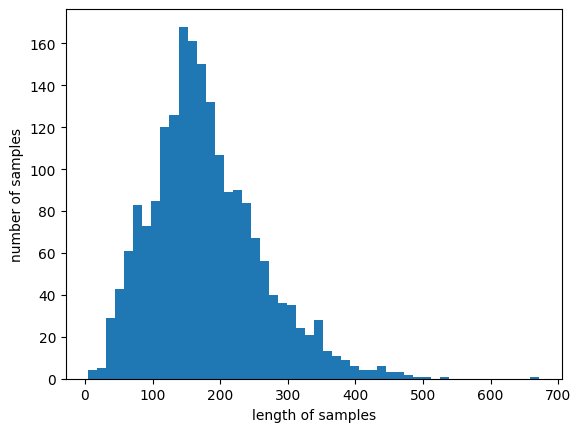

In [18]:
print('훈련용 data의 최대 길이 :{}'.format(max(len(sample) for sample in X_train)))
print('훈련용 data의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(sample) for sample in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
y_train

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

<Axes: ylabel='count'>

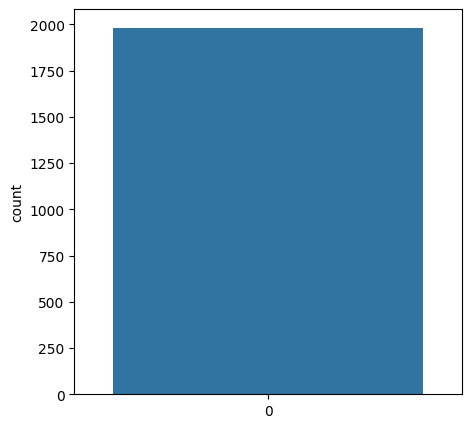

In [26]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(5,5)
sns.countplot(y_train)

In [28]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[   0    1]
 [ 663 1319]]


In [31]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'the': 1, 'of': 2, 'to': 3, 'and': 4, 'a': 5, 'that': 6, 'in': 7, 'court': 8, 'for': 9, 'was': 10, 'on': 11, 'district': 12, 'not': 13, 'his': 14, 'by': 15, 'an': 16, 'state': 17, 'with': 18, 'federal': 19, 'appeals': 20, 'had': 21, 'as': 22, 'circuit': 23, 'from': 24, 'he': 25, 's': 26, 'under': 27, 'u': 28, 'it': 29, 'act': 30, 'which': 31, 'were': 32, 'states': 33, 'or': 34, 'because': 35, 'united': 36, 'held': 37, 'be': 38, 'supreme': 39, 'at': 40, 'did': 41, 'its': 42, 'trial': 43, 'after': 44, 'filed': 45, 'affirmed': 46, 'but': 47, 'case': 48, 'law': 49, 'their': 50, 'against': 51, 'et': 52, 'al': 53, 'they': 54, 'is': 55, 'new': 56, 'denied': 57, 'found': 58, 'this': 59, 'her': 60, 'him': 61, 'amendment': 62, 'argued': 63, 'appeal': 64, 'inc': 65, 'when': 66, 'violated': 67, 'jury': 68, 'reversed': 69, 'would': 70, 'granted': 71, 'other': 72, 'two': 73, 'first': 74, 'decision': 75, 'claim': 76, 'suit': 77, 'have': 78, 'company': 79, 'evidence': 80, 'claims': 81, 'government': 

In [32]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

In [33]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[4]))

빈도수 상위 1번 단어 : the


In [34]:
print('빈도수 상위 128등 단어 : {}'.format(index_to_word[131]))

빈도수 상위 128등 단어 : public


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

max_len = 180



X_train = pad_sequences(X_train, maxlen=max_len)
print("훈련 데이터의 크기(shape):", X_train.shape)
X_val = pad_sequences(X_val, maxlen=max_len)
print("검증 데이터의 크기(shape):", X_val.shape)
X_test = pad_sequences(X_test, maxlen=max_len)
print("테스트 데이터의 크기(shape):", X_test.shape)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

훈련 데이터의 크기(shape): (1982, 180)
검증 데이터의 크기(shape): (496, 180)
테스트 데이터의 크기(shape): (1240, 180)


In [39]:
from tensorflow.keras.layers import Dropout

In [45]:
vocab_size = len(word_to_index) + 1
embedding_dim = 128
hidden_units = 128
num_classes = 2

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dropout(.2))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_val, y_val))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         2400384   
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 2,532,226
Trainable params: 2,532,226
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - ETA: 0s - loss: 0.6573 - acc: 0.6473
Epoch 1: val_acc improved from -inf to 0.66532, saving model to best_model.h5
16/16 [==

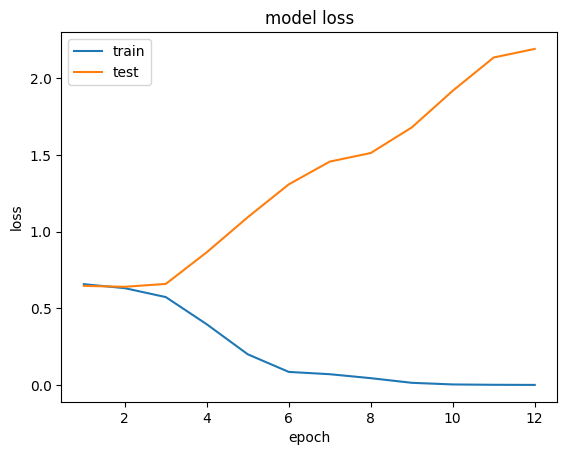

In [46]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

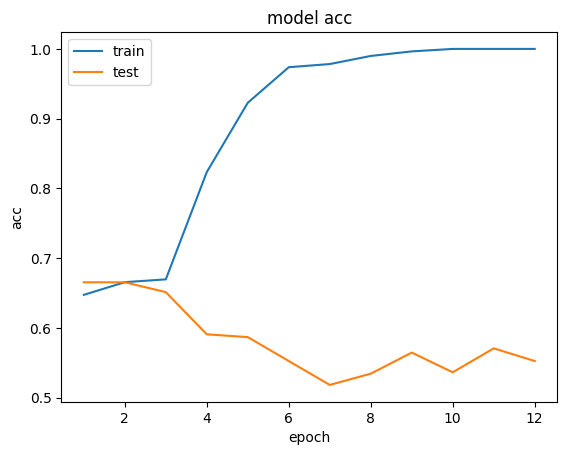

In [47]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
model.predict(X_test)

39/39 [==============================] - 1s 21ms/step


array([[0.99753225, 0.0024677 ],
       [0.9935882 , 0.00641177],
       [0.00107403, 0.998926  ],
       ...,
       [0.00622817, 0.99377185],
       [0.9564493 , 0.04355071],
       [0.00387673, 0.99612325]], dtype=float32)

In [51]:
print("\n 검증 정확도: %.4f" % (model.evaluate(X_val, y_val)[1]))

16/16 [==============================] - 0s 21ms/step - loss: 2.1898 - acc: 0.5524

 검증 정확도: 0.5524


In [52]:
result = model.predict(X_test)

39/39 [==============================] - 1s 22ms/step


In [66]:
submission = pd.read_csv('./sample_submission.csv')

In [68]:
submission['first_party_winner'] = tf.argmax(result, axis=1).numpy()

In [70]:
submission.to_csv('with_lstm.csv',index=False)

In [56]:
import tensorflow as tf

tf.expand_dims(X_test[0], 0)

<tf.Tensor: shape=(1, 180), dtype=int32, numpy=
array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [64]:
model.predict_on_batch(tf.expand_dims(X_test[0], 0))

array([[0.99753225, 0.0024677 ]], dtype=float32)

In [65]:
tf.argmax(result, axis=1).numpy()

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [53]:
result

array([[0.99753225, 0.0024677 ],
       [0.9935882 , 0.00641177],
       [0.00107403, 0.998926  ],
       ...,
       [0.00622817, 0.99377185],
       [0.9564493 , 0.04355071],
       [0.00387673, 0.99612325]], dtype=float32)